In [1]:
# VISUALIZING TEXT DATA
# Visualizing the dependency parse
import spacy

In [2]:
from spacy import displacy

In [3]:
from pathlib import Path

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
from spacy import displacy

def visualize(doc, is_list=False):
    options = {
        "add_lemma": True,
        "compact": True,
        "color": "green",
        "collapse_punct": True,
        "arrow_spacing": 20,
        "bg": "#FFFFE6",
        "font": "Times",
        "distance": 120
    }

    if is_list:
        # Using displacy.render for visualizing in Jupyter
        html = displacy.render(list(doc.sents), style='dep', options=options, jupyter=True)
    else:
        # Using displacy.render for one doc
        html = displacy.render(doc, style='dep', options=options, jupyter=True)


In [6]:
short_text = "The great diversity of life today evolved from less-diverse ancestral organisms over billions of years."

In [7]:
doc = nlp(short_text)
visualize(doc)

In [8]:
long_text = '''To Sherlock Holmes she is always _the_ woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer—excellent for drawing the veil from men's motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory.'''

In [9]:
doc = nlp(long_text)
visualize(doc, is_list=True)

In [10]:
def save_dependency_parse(doc, path):
    output_path = Path(path)
    svg = displacy.render(doc, style="dep", jupyter=False)
    output_path.open("w", encoding="utf-8").write(svg)

In [11]:
text = "The great diversity of life evolved from less- diverse ancestral organisms."

In [12]:
doc = nlp(text)

In [13]:
save_dependency_parse(doc, "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/DM_dependency_parse.svg")

In [14]:
#Visualizing parts of speech 
import spacy

In [15]:
import matplotlib.pyplot as plt

In [16]:
import sys
sys.path.append("/Users/dariamartinovskaya/Downloads/PLN")
from Chapter01.dividing_into_sentences import read_text_file

In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
past_tags = ["VBD", "VBN"]

In [19]:
present_tags = ["VBG", "VBP", "VBZ"]

In [20]:
def visualize_verbs(text_file):
    text = read_text_file(text_file)
    doc = nlp(text)
    verb_dict = {"Inf":0, "Past":0, "Present":0}
    for token in doc:
        if (token.tag_ == "VB"):
            verb_dict["Inf"] = verb_dict["Inf"] + 1
        if (token.tag_ in past_tags):
            verb_dict["Past"] = verb_dict["Past"] + 1
        if (token.tag_ in present_tags):
            verb_dict["Present"] = \
            verb_dict["Present"] + 1
    plt.bar(range(len(verb_dict)),
            list(verb_dict.values()),
            align='center', color=["red","green","blue"])
    plt.xticks(range(len(verb_dict)),
                list(verb_dict.keys()))
    plt.show()

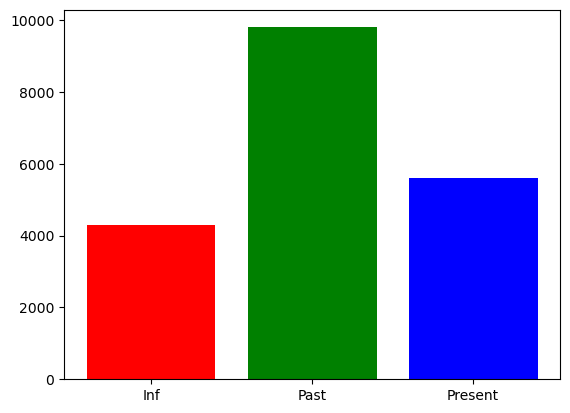

In [21]:
visualize_verbs("/Users/dariamartinovskaya/Downloads/PLN/Chapter01/sherlock_holmes.txt")

In [32]:
#Visualizing NER
import spacy

In [33]:
from spacy import displacy

In [34]:
nlp = spacy.load('en_core_web_sm')

In [35]:
def visualize(doc):
    colors = {"ORG":"green", "PERSON":"yellow"}
    options = {"colors": colors}
    displacy.render(doc, style='ent', options=options, jupyter=True)

In [36]:
text = """iPhone 12: Apple makes jump to 5G Apple has confirmed its iPhone 12 handsets will be its first to work on faster 5G networks. The company has also extended the range to include a new "Mini" model that has a smaller 5.4in screen. The US firm bucked a wider industry downturn by increasing its handset sales over the past year. But some experts say the new features give Apple its best opportunity for growth since 2014, when it revamped its line-up with the iPhone 6. "5G will bring a new level of performance for downloads and uploads, higher quality video streaming, more responsive gaming, real-time interactivity and so much more," said chief executive Tim Cook. There has also been a cosmetic refresh this time round, with the sides of the devices getting sharper, flatter edges. The higher-end iPhone 12 Pro models also get bigger screens than before and a new sensor to help with low-light photography. However, for the first time none of the devices will be bundled with headphones or a charger."""

In [37]:
doc = nlp(text)

In [38]:
doc.user_data["title"] = "iPhone 12: Apple makes jump to 5G"

In [39]:
visualize(doc)

In [40]:
def save_ent_html(doc, path):
    html = displacy.render(doc, style="ent", jupyter=False)
    with open(path, "w", encoding="utf-8") as html_file:
        html_file.write(html)
    html_file.close()

In [41]:
save_ent_html(doc, "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/DM_ner_vis.html")

In [144]:
#Constructing word clouds
import os

In [145]:
import nltk

In [146]:
from os import path

In [147]:
import matplotlib.pyplot as plt

In [148]:
from wordcloud import WordCloud, STOPWORDS

In [149]:
from Chapter01.dividing_into_sentences import read_text_file

In [150]:
from Chapter01.removing_stopwords import compile_stopwords_list_frequency

In [151]:
def create_wordcloud(text, stopwords, filename):
    wordcloud = \
    WordCloud(min_font_size=10, max_font_size=100, stopwords=stopwords, width=1000, height=1000, max_words=1000, background_color="white").generate(text)
    wordcloud.to_file(filename)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [152]:
text_file = "/Users/dariamartinovskaya/Downloads/PLN/Chapter01/sherlock_holmes.txt"

In [153]:
text = read_text_file(text_file)

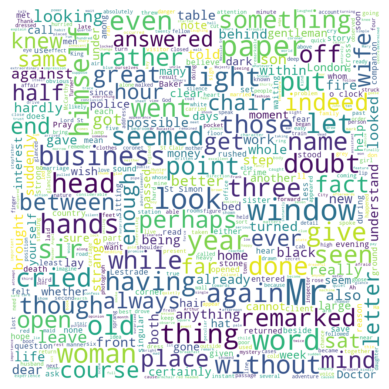

In [154]:
create_wordcloud(text, compile_stopwords_list_frequency(text), "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/sherlock_wc.png")

In [155]:
import numpy as np

In [156]:
from PIL import Image

In [157]:
def create_wordcloud(text, stopwords, filename, apply_mask=None):
    if apply_mask is not None:
        wordcloud = WordCloud(background_color="white", max_words=2000, mask=apply_mask, stopwords=stopwords, min_font_size=10, max_font_size=100) 
        wordcloud.generate(text) 
        wordcloud.to_file(filename)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.figure()
        plt.imshow(apply_mask, cmap=plt.cm.gray, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        wordcloud = WordCloud(min_font_size=10, max_font_size=100, stopwords=stopwords, width=1000, 
 height=1000, max_words=1000, background_color="white").generate(text)
        wordcloud.to_file(filename)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

In [165]:
text_file = "/Users/dariamartinovskaya/Downloads/PLN/Chapter01/sherlock_holmes.txt"
text = read_text_file(text_file)

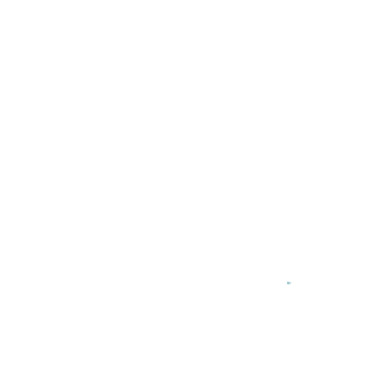

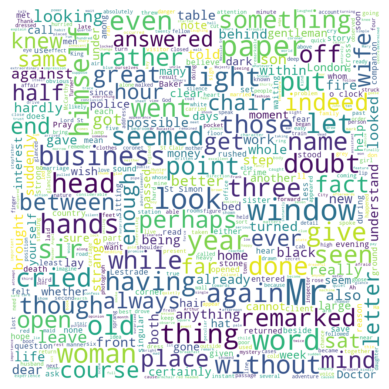

In [169]:
sherlock_data = Image.open("/Users/dariamartinovskaya/Downloads/PLN/Chapter08/sherlock_wc.png")
sherlock_mask = np.array(sherlock_data)
create_wordcloud(text, compile_stopwords_list_frequency(text), "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/sherlock_mask.png", apply_mask=sherlock_mask)